# Exercise: Trending Skills

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

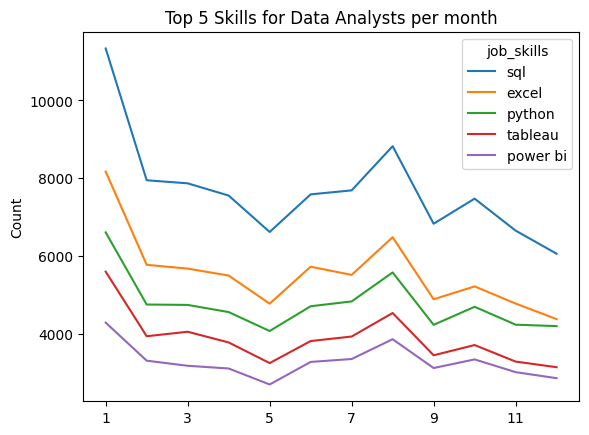

In [35]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot.sort_values(axis = 1, by = 'Total', inplace= True, ascending= False)

df_DA.reset_index(inplace= True)

df_DA_pivot_short = df_DA_pivot.iloc[:12, 0:5]

df_DA_pivot_short.plot(kind = 'line')

# Alternatively sort just the total row and find the index of the sorted series and index on those 5 job skills 
plt.title('Top 5 Skills for Data Analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()